# Exploratory Data Analysis
Demo from lecture 2 of [ORIE 4741](https://people.orie.cornell.edu/mru8/orie4741)

In [54]:
# Install packages
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("StatsPlots")

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...
 Installed RData ───── v0.6.0
 Installed Mocking ─── v0.5.7
 Installed RDatasets ─ v0.6.1
 Installed TimeZones ─ v0.8.5
 Installed EzXML ───── v0.9.0
  Updating `~/.julia/Project.toml`
  [ce6b1742] + RDatasets v0.6.1
  Updating `~/.julia/Manifest.toml`
  [336ed68f] + CSV v0.4.3
  [8f5d6c58] + EzXML v0.9.0
  [5789e2e9] + FileIO v1.0.5
  [78c3b35d] + Mocking v0.5.7
  [4d1e1d77] + Nullables v0.0.8
  [69de0a69] + Parsers v0.2.16
  [df47a6cb] + RData v0.6.0
  [ce6b1742] + RDatasets v0.6.1
  [f269a46b] + TimeZones v0.8.5
  Building EzXML ────→ `~/.julia/packages/EzXML/DUxj7/deps

In [52]:
# bring packages into main namespace
using DataFrames             # Data tables are called "DataFrames"
using Plots, StatsPlots      # load plotting packages 
using Statistics             # basic statistical functions

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1192


# Load data

The data is available on the course website, and is about 200MB.

If you point your browser to the url below, it will be downloaded to your standard download folder. On Mac, you can access it at `/Users/yourusername/Downloads/acs_2013.csv`.

In [3]:
url = "https://people.orie.cornell.edu/mru8/orie4741/data/acs_2013.csv"

"https://people.orie.cornell.edu/mru8/orie4741/data/acs_2013.csv"

Or, if you've synced or cloned the whole demos GitHub repo, you can access the truncated version `acs_2013_trunc.csv` locally without doing anything. (Try the readtable command below to test it out.)

In [16]:
acs = readtable("acs_2013_trunc.csv", nrows=10000)
head(acs)

,ACREHOUS,CLASSWKR,COMMUSE,COSTELEC,COSTGAS,COSTWATR,EDUC,EMPSTAT,FOODSTMP,GRADEATT,HCOVANY,HHINCOME,HHTYPE,LABFORCE,LOOKING,METRO,OWNERSHP,SCHOOL,STATEICP,UHRSWORK,WKSWORK2
,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰
1,0,0,0,0.0,0.0,0.0,7,3.0,1,6,2,1.0e7,0.0,1,1,4.0,0,2,41.0,0.0,0
2,1,2,1,4200.0,9993.0,480.0,8,1.0,1,0,2,151000.0,1.0,2,3,0.0,1,1,41.0,40.0,6
3,1,1,1,4200.0,9993.0,480.0,6,1.0,1,0,2,151000.0,1.0,2,3,0.0,1,1,41.0,40.0,6
4,1,0,1,4200.0,9993.0,480.0,7,3.0,1,6,2,151000.0,1.0,1,1,0.0,1,2,41.0,0.0,0
5,1,0,1,4200.0,9993.0,480.0,7,3.0,1,6,2,151000.0,1.0,1,1,0.0,1,2,41.0,0.0,0
6,1,2,1,3600.0,9993.0,700.0,10,1.0,1,0,2,39930.0,6.0,2,3,0.0,1,1,41.0,40.0,6


# Summary statistics

In [17]:
size(acs)

(10000, 21)

In [18]:
income = acs[:HHINCOME];

In [19]:
median(income)

55000.0

In [20]:
mean(income)

568847.3694

In [21]:
std(income)

2.1760479511254504e6

In [22]:
maximum(income)

9.999999e6

In [23]:
# Plotting

In [24]:
"""compute summary statistics on observed values in data array"""
function summary_stats(arr)
    clean_arr = skipmissing(arr)
    print("missing: $(mean(ismissing.(arr)))%\n")
    print("maximum: $(maximum(clean_arr))\n")
    print("minimum: $(minimum(clean_arr))\n")
    print("median:  $(median(clean_arr))\n")
    print("mean:    $(mean(clean_arr))\n")
    print("std:     $(std(clean_arr))\n")
end

summary_stats

In [25]:
?summary_stats

search: summary_stats



compute summary statistics on observed values in data array


In [26]:
summary_stats(income)

missing: 0.0%
maximum: 9.999999e6
minimum: 0.0
median:  55000.0
mean:    568847.3694
std:     2.1760479511254486e6


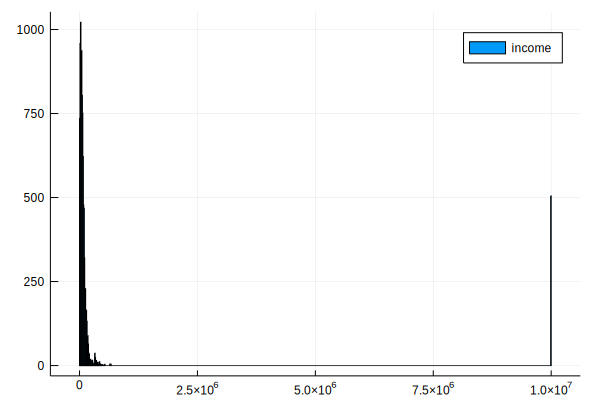

In [28]:
histogram(acs[:HHINCOME], label="income")

In [30]:
rows_with_99percent_income = acs[:HHINCOME].<4e6
acs99 = acs[rows_with_99percent_income,:];

In [31]:
head(acs99)

,ACREHOUS,CLASSWKR,COMMUSE,COSTELEC,COSTGAS,COSTWATR,EDUC,EMPSTAT,FOODSTMP,GRADEATT,HCOVANY,HHINCOME,HHTYPE,LABFORCE,LOOKING,METRO,OWNERSHP,SCHOOL,STATEICP,UHRSWORK,WKSWORK2
,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰,Int64⍰,Float64⍰,Float64⍰,Int64⍰
1,1,2,1,4200.0,9993.0,480.0,8,1.0,1,0,2,151000.0,1.0,2,3,0.0,1,1,41.0,40.0,6
2,1,1,1,4200.0,9993.0,480.0,6,1.0,1,0,2,151000.0,1.0,2,3,0.0,1,1,41.0,40.0,6
3,1,0,1,4200.0,9993.0,480.0,7,3.0,1,6,2,151000.0,1.0,1,1,0.0,1,2,41.0,0.0,0
4,1,0,1,4200.0,9993.0,480.0,7,3.0,1,6,2,151000.0,1.0,1,1,0.0,1,2,41.0,0.0,0
5,1,2,1,3600.0,9993.0,700.0,10,1.0,1,0,2,39930.0,6.0,2,3,0.0,1,1,41.0,40.0,6
6,2,0,1,2640.0,240.0,360.0,5,3.0,2,0,2,11400.0,3.0,1,1,1.0,2,1,41.0,0.0,0


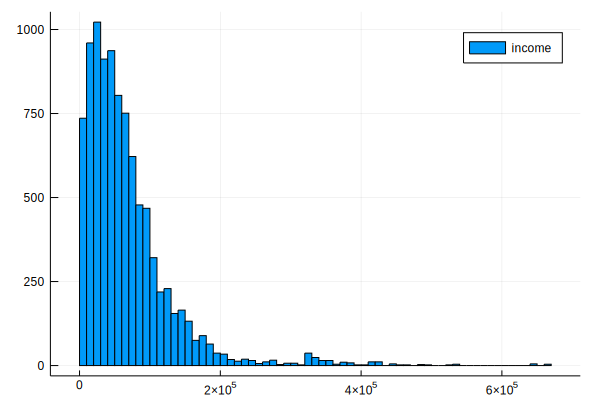

In [34]:
histogram(acs99[:HHINCOME], label="income")

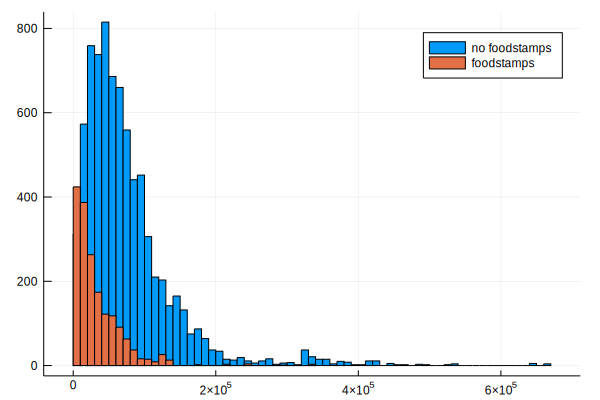

In [58]:
@df acs99 histogram(:HHINCOME, group=:FOODSTMP, labels=["no foodstamps", "foodstamps"])

# Now with recoded data
The truncated version of the cleaned data set is in the demos repo as `acs_2013_cleaned_trunc.csv`.

In [59]:
acs = readtable("acs_2013_cleaned_trunc.csv", nrows=10000);

In [60]:
summary_stats(acs[:HHINCOME])

missing: 0.0606%
maximum: 664040.0
minimum: 1.0
median:  52000.0
mean:    67966.16978922716
std:     64930.350456016495


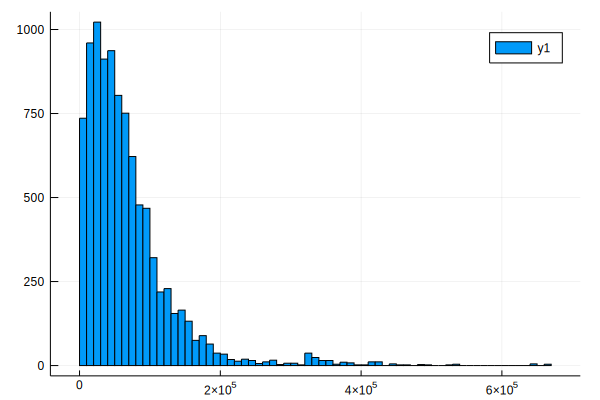

In [61]:
@df acs99 histogram(:HHINCOME) 

In [62]:
"""drop all rows of a data frame with a NA in column named s"""
function dropmissing(df::DataFrame, s::Symbol)
    return df[.!ismissing.(acs[:,s]),:]
end
function dropmissing(df::DataFrame, ss::Symbol...)
    keep_rows = fill(true, size(df,1))
    for s in ss
        keep_rows = keep_rows .& .!ismissing.(df[:,s])
    end
    return df[keep_rows,:]
end

dropmissing (generic function with 2 methods)

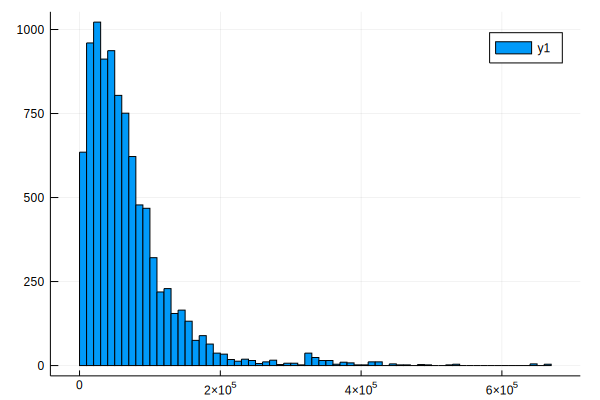

In [83]:
@df acs histogram(:HHINCOME)

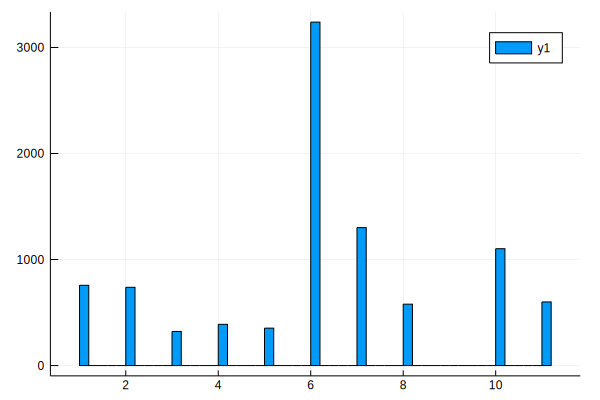

In [85]:
@df acs histogram(:EDUC)

Look at income distribution by :FOODSTMP, :LABFORCE, :OWNERSHP, ...

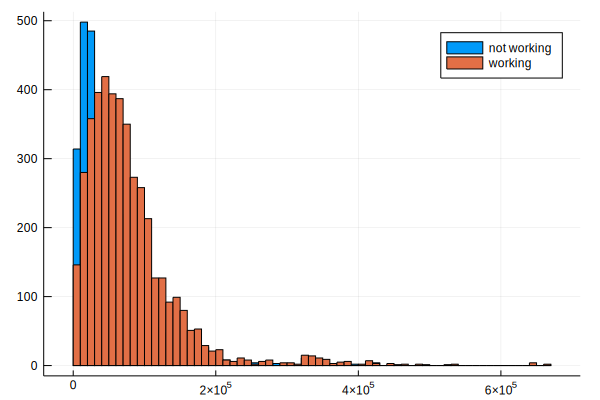

In [89]:
@df dropmissing(acs, :LABFORCE) histogram(:HHINCOME, group=:LABFORCE, labels=["not working", "working"])

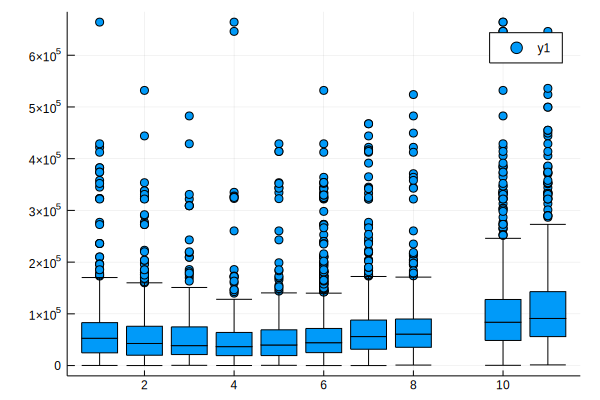

In [91]:
@df dropmissing(acs, :EDUC, :HHINCOME) boxplot(:EDUC, :HHINCOME)

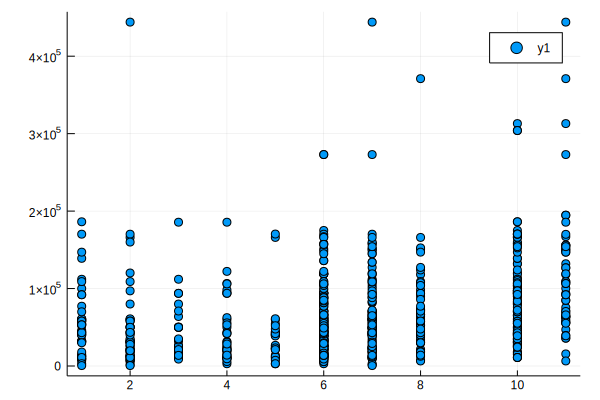

In [92]:
@df dropmissing(acs, :EDUC, :HHINCOME)[1:800,:] scatter(:EDUC, :HHINCOME)

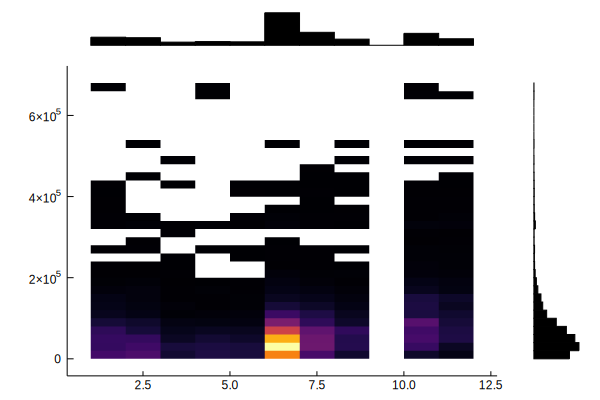

In [93]:
@df dropmissing(acs, :EDUC, :HHINCOME) marginalhist(:EDUC, :HHINCOME)

# More good plotting tools: 

* [Plots.jl](https://juliaplots.github.io) in Julia
* [Gadfly documentation](http://dcjones.github.io/Gadfly.jl) in Julia
* [ggplot2](http://ggplot2.org/) in R
* [MatPlotLib](http://matplotlib.org/) in Python or Julia
* [D3](https://d3js.org/) in JavaScript